In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
path = "~/codedata/houseprice/"
testfile = path +"test.csv"
trainfile = path + "train.csv"

train = pd.read_csv(trainfile)

In [3]:
train.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [4]:
type(train.columns)

pandas.core.index.Index

In [5]:
train['SalePrice'].describe() 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

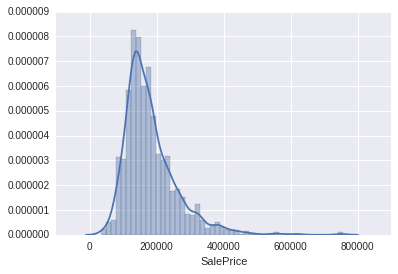

In [6]:
sns.distplot(train['SalePrice'])

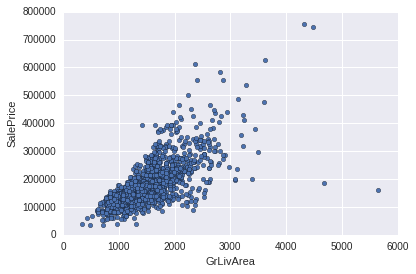

In [7]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

(-0.5, 9.5, 0, 800000)

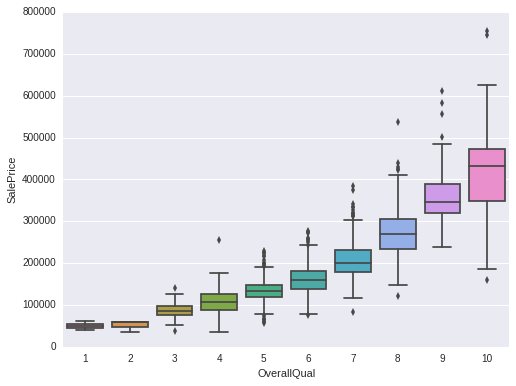

In [8]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)
# data.plot.scatter(x=var,y='SalePrice', ylim=(0,800000))

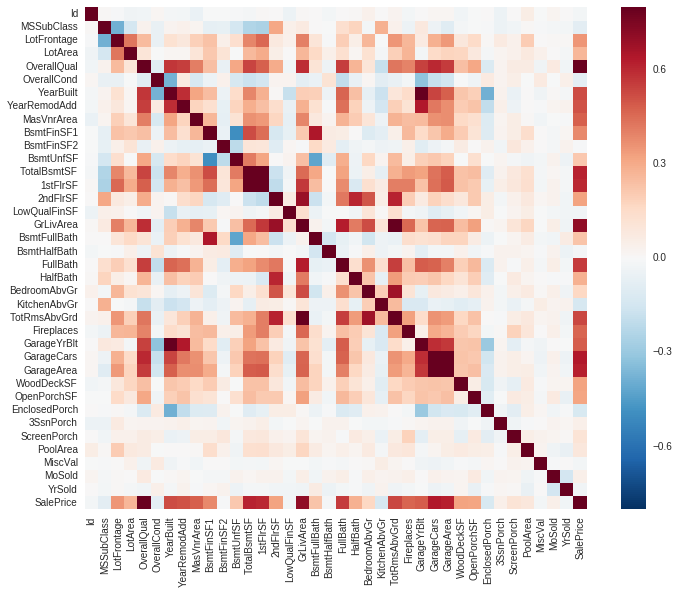

In [9]:
# correlation matrix
corrmat = train.corr()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

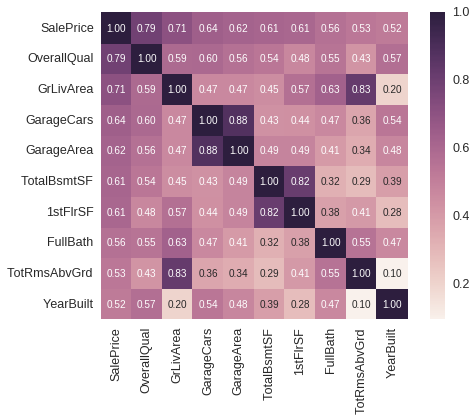

In [10]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
# according to the year maybe time-series analysis is needed

In [11]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
# missing_data.head(25)
# train.isnull().count()


In [12]:
# var='PoolQC'
# sns.displot(train[var])
# train[var]
# data = pd.concat([train['SalePrice'], train[var]],axis=1)
# data.plot.scatter(x ='SalePrice', y=var)
train.shape
train = train.drop((missing_data[missing_data['Total'] > 1]).index,1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max() #just checking that there's no missing data missing...

0

In [13]:
saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print saleprice_scaled.shape
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

(1459, 1)
outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


In [14]:
train.sort_values(by='GrLivArea', ascending = False)[:3]
print train.shape                            
# train[train['Id'] == 1299].index
train.drop(train[train['Id'] == 1299].index)
print train.shape
train.drop(train[train['Id'] == 524].index)

(1459, 63)
(1459, 63)


Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
5        6          50       RL    14115   Pave      IR1         Lvl   
6        7          20       RL    10084   Pave      Reg         Lvl   
7        8          60       RL    10382   Pave      IR1         Lvl   
8        9          50       RM     6120   Pave      Reg         Lvl   
9       10         190       RL     7420   Pave      Reg         Lvl   
10      11          20       RL    11200   Pave      Reg         Lvl   
11      12          60       RL    11924   Pave      IR1         Lvl   
12      13          20       RL    12968   Pave      IR2         Lvl   
13      14          20       RL    10652   Pave      IR1         Lvl   
14      15          20       RL    10920   Pave      IR1         Lvl   
15      16          45       RM     6120   Pave      Reg         Lvl   
16      17          20       RL    11241   Pave      IR1         Lvl   
17      18          90       RL    10791   Pave      Reg         Lvl   
18      19          20       RL    13695   Pave      Reg         Lvl   
19      20          20       RL     7560   Pave      Reg         Lvl   
20      21          60       RL    14215   Pave      IR1         Lvl   
21      22          45       RM     7449   Pave      Reg         Bnk   
22      23          20       RL     9742   Pave      Reg         Lvl   
23      24         120       RM     4224   Pave      Reg         Lvl   
24      25          20       RL     8246   Pave      IR1         Lvl   
25      26          20       RL    14230   Pave      Reg         Lvl   
26      27          20       RL     7200   Pave      Reg         Lvl   
27      28          20       RL    11478   Pave      Reg         Lvl   
28      29          20       RL    16321   Pave      IR1         Lvl   
29      30          30       RM     6324   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1430  1431          60       RL    21930   Pave      IR3         Lvl   
1431  1432         120       RL     4928   Pave      IR1         Lvl   
1432  1433          30       RL    10800   Pave      Reg         Lvl   
1433  1434          60       RL    10261   Pave      IR1         Lvl   
1434  1435          20       RL    17400   Pave      Reg         Low   
1435  1436          20       RL     8400   Pave      Reg         Lvl   
1436  1437          20       RL     9000   Pave      Reg         Lvl   
1437  1438          20       RL    12444   Pave      Reg         Lvl   
1438  1439          20       RM     7407   Pave      Reg         Lvl   
1439  1440          60       RL    11584   Pave      Reg         Lvl   
1440  1441          70       RL    11526   Pave      IR1         Bnk   
1441  1442         120       RM     4426   Pave      Reg         Lvl   
1442  1443          60       FV    11003   Pave      Reg         Lvl   
1443  1444          30       RL     8854   Pave      Reg         Lvl   
1444  1445          20       RL     8500   Pave      Reg         Lvl   
1445  1446          85       RL     8400   Pave      Reg         Lvl   
1446  1447          20       RL    26142   Pave      IR1         Lvl   
1447  1448          60       RL    10000   Pave      Reg         Lvl   
1448  1449          50       RL    11767   Pave      Reg         Lvl   
1449  1450         180       RM     1533   Pave      Reg         Lvl   
1450  1451          90       RL     9000   Pave      Reg         Lvl   
1451  1452          20       RL     9262   Pave      Reg         Lvl   
1452  1453         180       RM     3675   Pave      Reg         Lvl   
1453  1454          20       RL    17217   Pave 

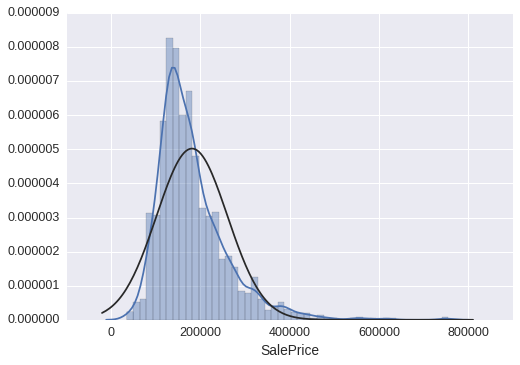

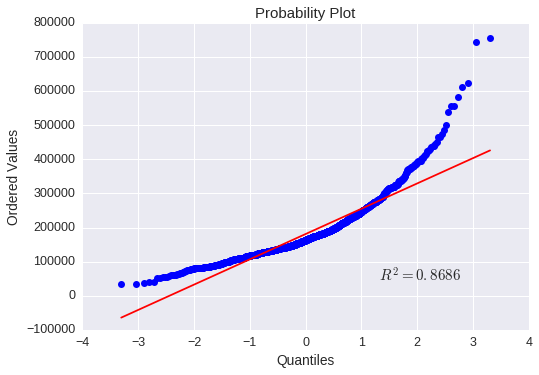

In [15]:
sns.distplot(train['SalePrice'],fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

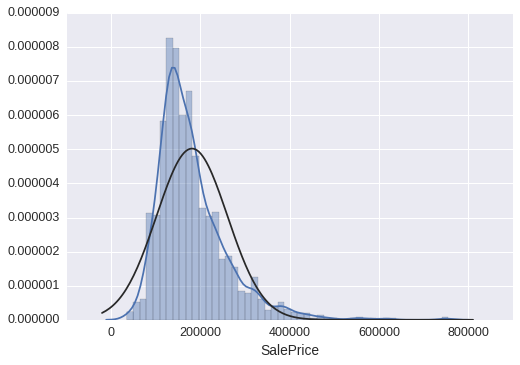

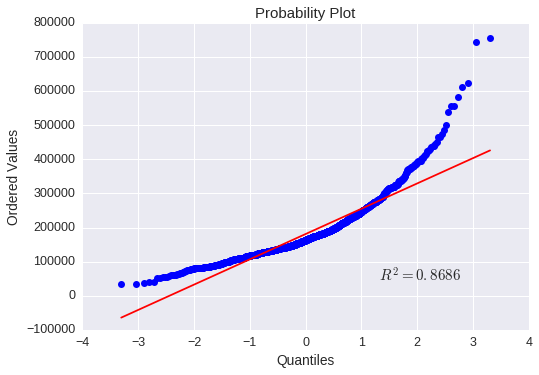

In [16]:
# train['SalePrice'] = np.log(train['SalePrice'])
sns.distplot(train['SalePrice'], fit = norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

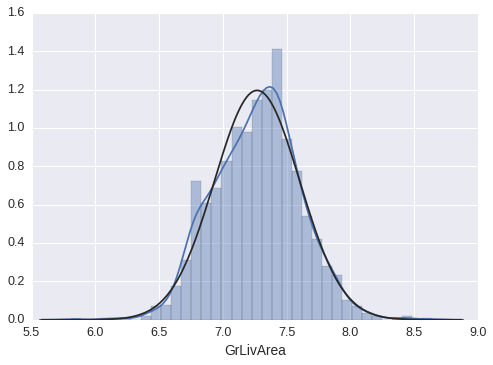

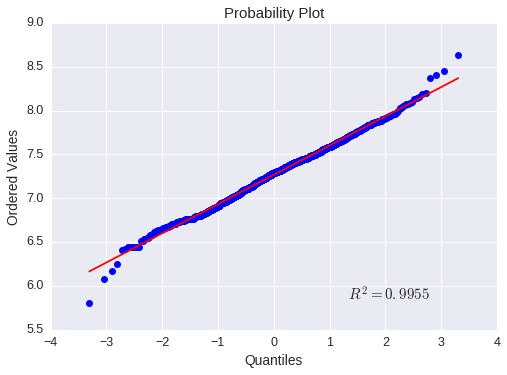

In [17]:
train['GrLivArea'] = np.log(train['GrLivArea'])
sns.distplot(train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

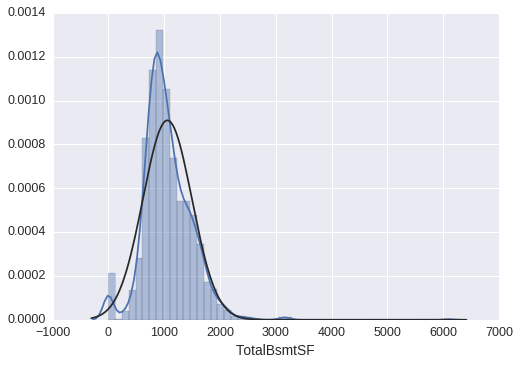

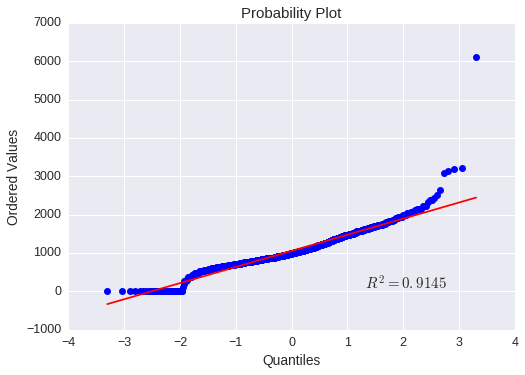

In [18]:
sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

In [19]:
print train.shape
train['HasBsmt'] = pd.Series(len(train['TotalBsmtSF']), index = train.index)
train['HasBsmt'] = 0

(1459, 63)


In [20]:
train.loc[train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1

In [21]:
train.loc[train['HasBsmt']==1, 'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])

#histogram and normal probability plot
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

# that's all

In [22]:
train.shape


(1459, 64)

In [23]:
train = pd.get_dummies(train)

In [31]:
train.head()

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   1          60     8450            7            5       2003          2003   
1   2          20     9600            6            8       1976          1976   
2   3          60    11250            7            5       2001          2002   
3   4          70     9550            7            5       1915          1970   
4   5          60    14260            8            5       2000          2000   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF          ...            SaleType_ConLw  \
0         706           0        150          ...                         0   
1         978           0        284          ...                         0   
2         486           0        434          ...                         0   
3         216           0        540          ...                         0   
4         655           0        490          ...                         0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      1   
4             0             0            1                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 223 columns]